In [ ]:
"""
===-*- Vibration data analysis Tool -*-===
=====-*- General -*-=====
Copyright (c) makkiblog.com
MIT License 
coding: utf-8

===-*- VERSION -*-===
v0.0 Initial Release
vvvCODEvvv
"""

import numpy as np
import scipy.fftpack
from pylab import *
from scipy import signal
from scipy import interpolate
from scipy import integrate
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import os
import sys
import configparser
import codecs

mpl.rcParams['agg.path.chunksize'] = 100000

In [3]:
#図サイズと画質設定
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["savefig.dpi"] = 350
%config InlineBackend.figure_format = 'retina'

In [4]:
#解析対象ファイルの読み込み
input_file = "SampleData"  #CSVファイルの名前
f = codecs.open(input_file+".csv","r","shift_jis")
line = f.readline()
for i in range(7):
    f.readline()
header = f.readline().replace("\"", "").replace("\r\n","").split(",")
header[0] = 'time'
print("計測チャンネル")
print(header)
df = pd.read_csv(input_file+".csv", skiprows=14, names=header)

計測チャンネル
['time', 'Sensor1', 'Sensor2', 'Sensor3']


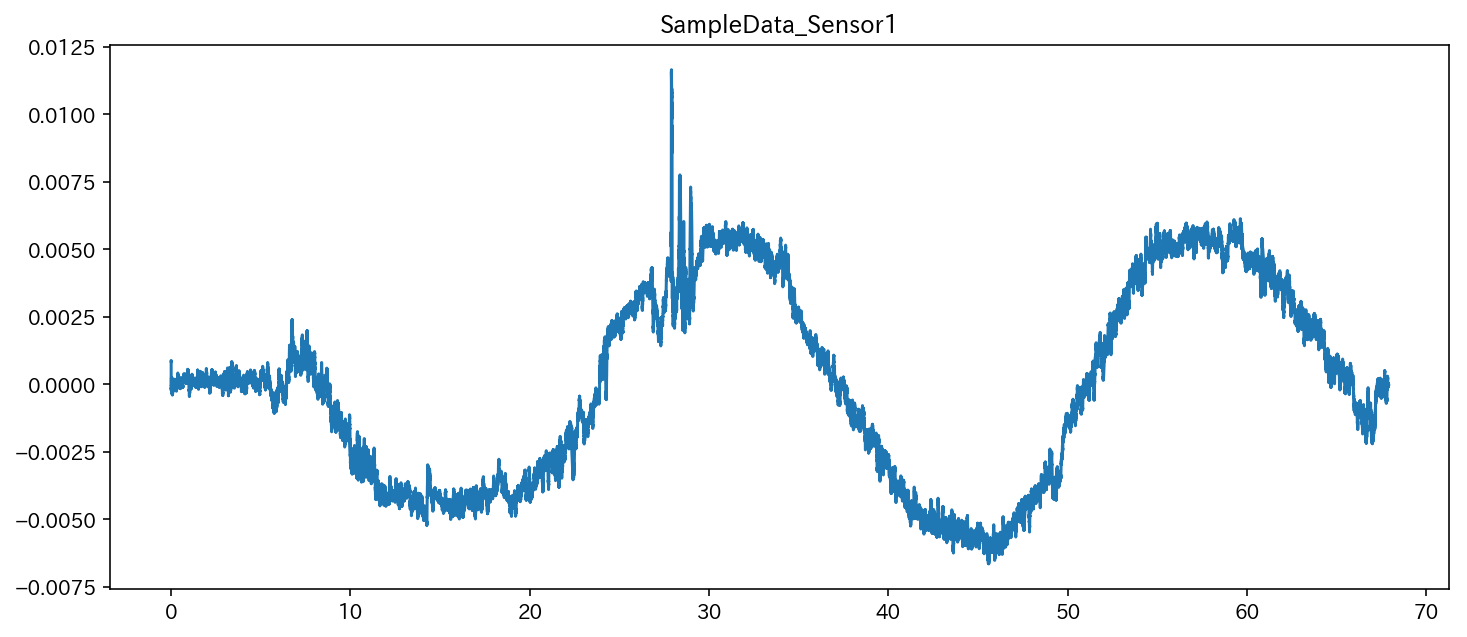

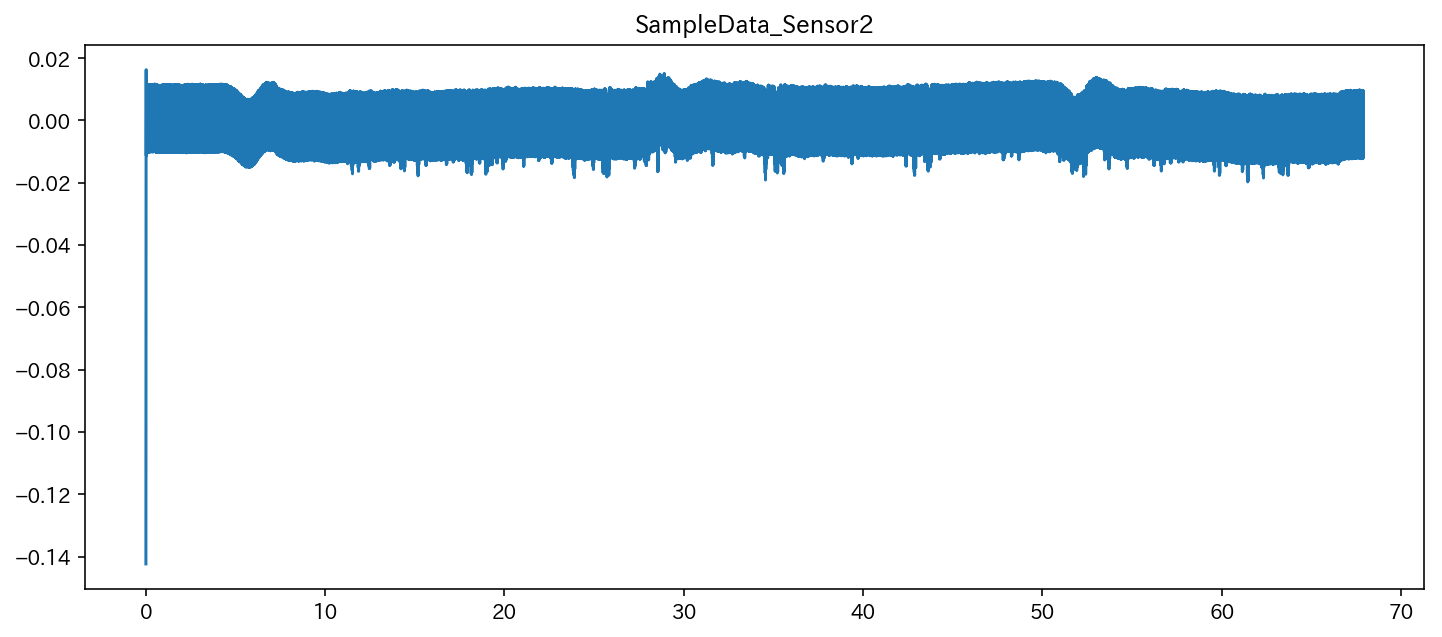

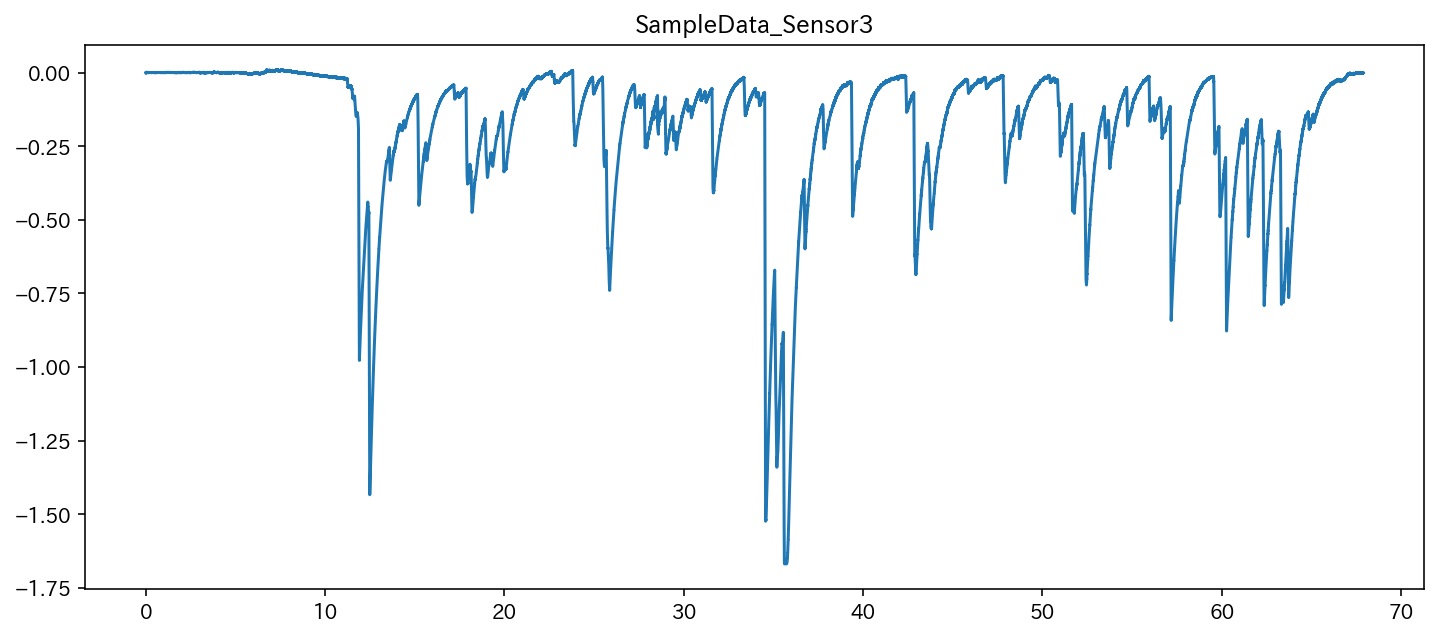

In [5]:
# 表示しやすくするため間引く
#とりあえずセンサ個数3個 (x,y,z軸)で想定。自由に増やしておｋ
df["Sensor1_ma"] = df["Sensor1"].rolling(window=100,min_periods=2).mean()
df["Sensor2_ma"] = df["Sensor2"].rolling(window=100,min_periods=2).mean()
df["Sensor3_ma"] = df["Sensor3"].rolling(window=100,min_periods=2).mean()

# とりあえず表示して解析をどうするか考える
plt.figure()
plt.plot(df.time, df.Sensor1_ma)
plt.title(input_file+"_Sensor1")
plt.savefig("Sensor1_%s.png" %(input_file))

plt.figure()
plt.plot(df.time, df.Sensor2_ma)
plt.title(input_file+"_Sensor2")
plt.savefig("Sensor2_%s.png" %(input_file))

plt.figure()
plt.plot(df.time, df.Sensor3_ma)
plt.title(input_file+"_Sensor3")
plt.savefig("Sensor3_%s.png" %(input_file))



In [6]:
#周波数解析（FFT）
dt = df.time[1] - df.time[0]
sampling = 1/dt

# 解析の開始時刻、終了時刻
ts = 30
te = 50

# 該当時間でデータ切り出し
#センサ校正係数に合わせて倍数をかける。
Sig1 = 100*df["Sensor1"].loc[df["time"]>ts ].loc[df["time"]<te]
Sig2 = 100*df["Sensor2"].loc[df["time"]>ts ].loc[df["time"]<te]
Sig3 = 100*df["Sensor3"].loc[df["time"]>ts ].loc[df["time"]<te]



Sensor1 gRMS [g]
14.346574543192482


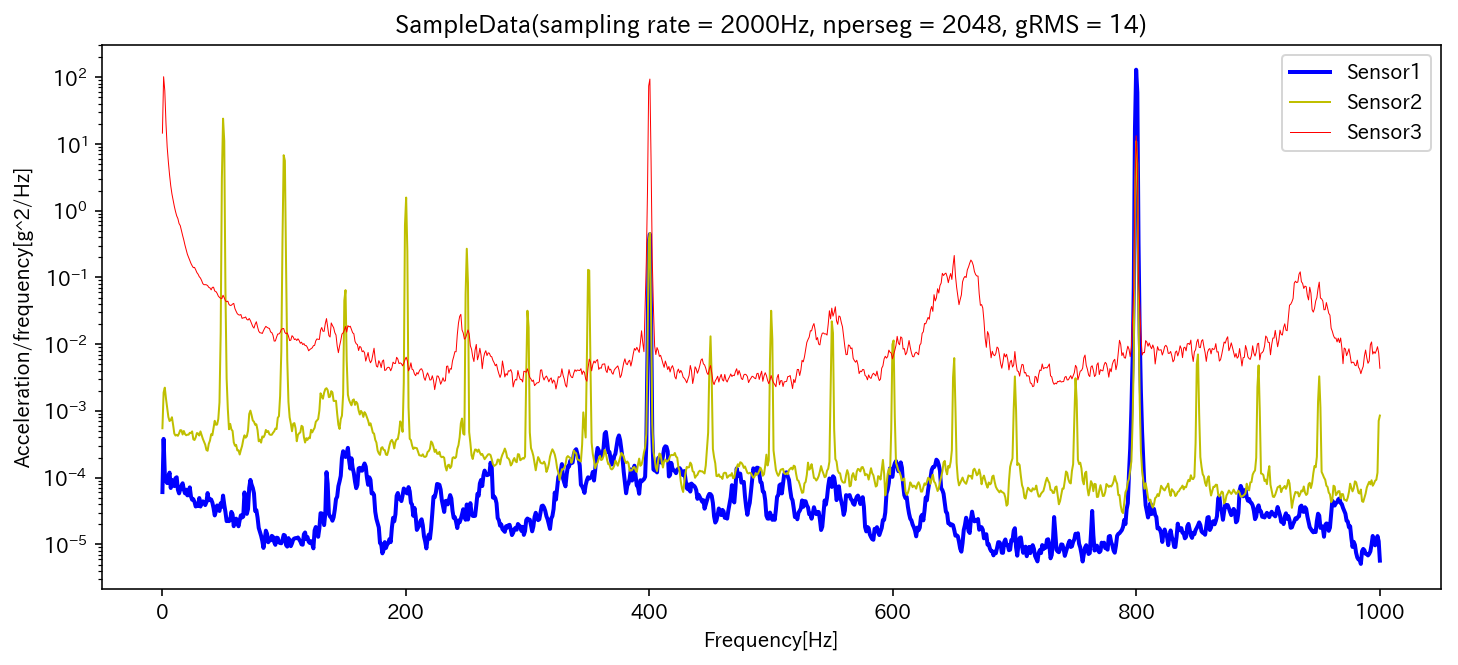

In [7]:
nperseg = 2**11

# Sigのところを任意のデータに変えれば任意のPSDがみられるよ
freq4_1, psd_1 = signal.welch(Sig1, sampling, nperseg=nperseg)
freq4_2, psd_2 = signal.welch(Sig2, sampling, nperseg=nperseg)
freq4_3, psd_3 = signal.welch(Sig3, sampling, nperseg=nperseg)

RMS = sqrt(psd_1.sum())

plt.figure()
plt.plot(freq4_1, psd_1, "b", linewidth='2', label='Sensor1')
plt.plot(freq4_2, psd_2, "y", linewidth='1', label='Sensor2')
plt.plot(freq4_3, psd_3, "r", linewidth='0.5', label='Sensor3')
plt.legend(loc="upper right")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Acceleration/frequency[g^2/Hz]")
plt.yscale('log')
plt.title(input_file+"(sampling rate = %dHz, nperseg = %d, gRMS = %d)" %(sampling, nperseg,RMS))
plt.savefig("PSD_%s.png" %(input_file))

print("Sensor1 gRMS [g]")
print(RMS)